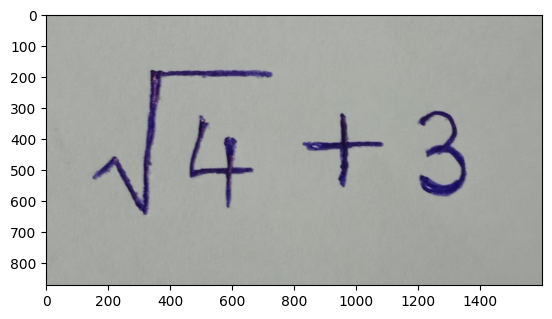

In [11]:
from skimage.segmentation import slic, mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
import numpy as np



def count_character_pixels(image, segments):
    character_pixel_counts = {}
    
    for segment_label in np.unique(segments):
        mask = segments == segment_label
        character_pixel_counts[segment_label] = np.count_nonzero(image[mask])
    
    return character_pixel_counts



def mask_text_clusters(image, segments, character_pixel_counts, threshold=50):
    masked_clusters = []
    
    for segment_label, count in character_pixel_counts.items():
        if count > threshold:
            mask = segments == segment_label
            masked_clusters.append(mask)
    
    return masked_clusters



def crop_and_print_clusters(image, masked_clusters):

    plt.figure(figsize=(16,5))
    fig, axes = plt.subplots(1, len(masked_clusters))

    for i, mask in enumerate(masked_clusters):
        masked_image = np.copy(image)
        masked_image[~mask] = 0
        
        rows, cols = np.where(mask)
        min_row, max_row = np.min(rows), np.max(rows)
        min_col, max_col = np.min(cols), np.max(cols)
        
        cropped_cluster = masked_image[min_row:max_row, min_col:max_col]
        
        axes[i].imshow(cropped_cluster)
        axes[i].axis('off')
    plt.show()


img_path = "/home/bcca/Desktop/Soham/DL Course Project/Handwritten-Equation-Solver/test_data/18.jpeg"
img = io.imread(img_path)[:,:,:3]
image = img_as_float(img)

numSegments = 8

segments = slic(image, n_segments=numSegments, sigma=5)

character_pixel_counts = count_character_pixels(image, segments)

masked_clusters = mask_text_clusters(image, segments, character_pixel_counts)

plt.imshow(image)
plt.show()


<Figure size 1600x500 with 0 Axes>

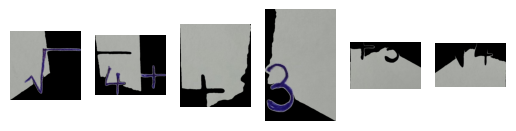

In [12]:
crop_and_print_clusters(image, masked_clusters)